Multiclass Classification
SVMs do not scale well to large datasets, so let's only train on the first 2,000 instances, or else this section will take a very long time to run:

Support Vector Machines (SVMs) are primarily binary classifiers but can be adapted for multiclass classification using two main strategies:

One-vs-One (OvO): Creates a binary classifier for every pair of classes and predicts the class by a majority vote from these classifiers. This approach is often computationally intensive if many classes exist but is effective for a moderate number of classes.

One-vs-All (OvA) or One-vs-Rest (OvR): Trains one binary classifier per class, each trying to separate that class from all the others. The predicted class for an instance is the one whose classifier outputs the highest score.

In popular implementations like scikit-learn, SVM multiclass classification usually defaults to OvA, but OvO is also supported and can be specified. These approaches allow SVMs to handle multi-class problems despite their intrinsic binary nature.

SVM works by finding the hyperplane that best separates data points of different classes with maximum margin. In multiclass cases, the classifiers learn these boundaries for each binary separation task.

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load digits dataset (multiclass)
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes to confirm
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Train set size: 1437 samples
Test set size: 360 samples


In [6]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_clf = SVC(random_state=42)

# Train the classifier on the training data
svm_clf.fit(X_train, y_train)

print("SVM training complete.")


SVM training complete.


In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Predict labels for test data
y_pred = svm_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# Print detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy on test set: 0.9861
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [8]:
# Select a sample digit from the test set
some_digit = X_test[0].reshape(1, -1)

# Predict the digit label
predicted_label = svm_clf.predict(some_digit)
print(f"Predicted label: {predicted_label[0]}")

# Get decision scores (confidence levels) for all classes
some_digit_scores = svm_clf.decision_function(some_digit)
print("Decision function scores for each class:")
print(some_digit_scores.round(2))

# Find the class with the highest score
class_id = some_digit_scores.argmax()
print(f"Class with highest confidence: {svm_clf.classes_[class_id]}")


Predicted label: 6
Decision function scores for each class:
[[3.85 4.89 0.74 0.73 6.95 4.87 9.31 0.73 8.26 3.84]]
Class with highest confidence: 6


Using the "ovo" decision function shape to get all pairwise class scores
By default, decision_function_shape is "ovr" (one-vs-rest), which aggregates the OvO scores. To see all 45 pairwise one-vs-one scores (for 10 classes), set the shape to "ovo":

In [9]:
# Set decision function to 'ovo' to get all pairwise class scores
svm_clf.decision_function_shape = "ovo"

# Get pairwise decision scores for the sample digit
some_digit_scores_ovo = svm_clf.decision_function(some_digit)
print("One-vs-One decision function scores (all 45 pairs):")
print(some_digit_scores_ovo.round(2))


One-vs-One decision function scores (all 45 pairs):
[[-0.07  0.33  0.07 -0.03 -0.13 -1.03  0.2  -0.29  0.1   0.43  0.4  -0.15
   0.23 -1.39  0.4  -0.35 -0.11 -0.13 -0.16 -0.16 -1.31  0.19 -0.79 -0.35
  -0.34 -0.44 -1.35 -0.01 -1.25 -0.42  0.14 -1.32  0.67 -0.42  0.05 -1.26
   0.29 -0.26  0.21  1.2   1.2   1.14 -1.   -0.34  0.64]]


Using One-vs-Rest with OneVsRestClassifier
Now let's explicitly train a one-vs-rest (OvR) multiclass classifier using scikit-learn's OneVsRestClassifier, which wraps around an SVC estimator.

This technique can sometimes improve interpretability and flexibility over the default behavior.

In [10]:
from sklearn.multiclass import OneVsRestClassifier

# Initialize OneVsRestClassifier with SVC as base estimator
ovr_clf = OneVsRestClassifier(SVC(random_state=42))

# Train on the full training set
ovr_clf.fit(X_train, y_train)

print("One-vs-Rest training complete on full training set.")

# Predict on a sample digit
ovr_pred = ovr_clf.predict(some_digit)
print(f"One-vs-Rest predicted label for sample digit: {ovr_pred[0]}")

# Number of binary classifiers trained (one per class)
print(f"Number of binary classifiers: {len(ovr_clf.estimators_)}")


One-vs-Rest training complete on full training set.
One-vs-Rest predicted label for sample digit: 6
Number of binary classifiers: 10


Using SGDClassifier for faster training on larger datasets
SGDClassifier is a linear model trained with stochastic gradient descent, often used as a fast alternative to SVMs for large datasets.

In [11]:
from sklearn.linear_model import SGDClassifier

# Initialize SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Train on full training data
sgd_clf.fit(X_train, y_train)

# Predict on the same sample digit
sgd_pred = sgd_clf.predict(some_digit)
print(f"SGDClassifier predicted label for sample digit: {sgd_pred[0]}")

# Get decision function scores from SGDClassifier
sgd_scores = sgd_clf.decision_function(some_digit)
print("SGD decision function scores:")
print(sgd_scores.round())


SGDClassifier predicted label for sample digit: 6
SGD decision function scores:
[[-1143. -1529. -4076. -3053. -2127. -2250.   969. -1552. -1301. -1829.]]


Cross-validate SGDClassifier and evaluate accuracy
Next, let's estimate its generalization performance using cross-validation and measure accuracy on training data with and without feature scaling.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cross-validation accuracy without scaling (this might be lower)
scores_no_scaling = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print("Cross-validation accuracy without scaling:", np.round(scores_no_scaling, 4))

# Scale training data (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))

# Cross-validation accuracy with scaling
scores_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print("Cross-validation accuracy with scaling:", np.round(scores_scaled, 4))


Cross-validation accuracy without scaling: [0.952  0.9562 0.9332]
Cross-validation accuracy with scaling: [0.9332 0.9582 0.9186]


Error Analysis with Confusion Matrix
To understand which classes the SGDClassifier confuses most often, let's generate confusion matrices from cross-validated predictions on scaled training data:

<Figure size 800x600 with 0 Axes>

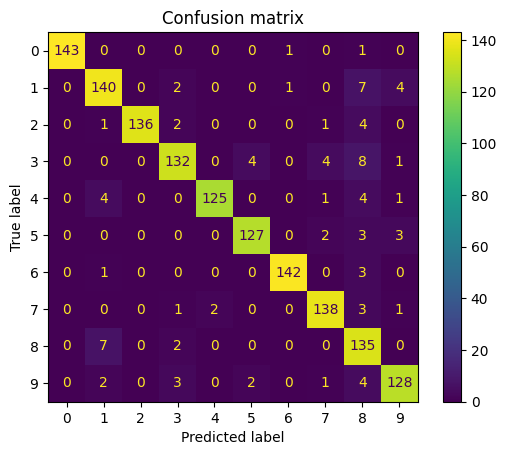

<Figure size 800x600 with 0 Axes>

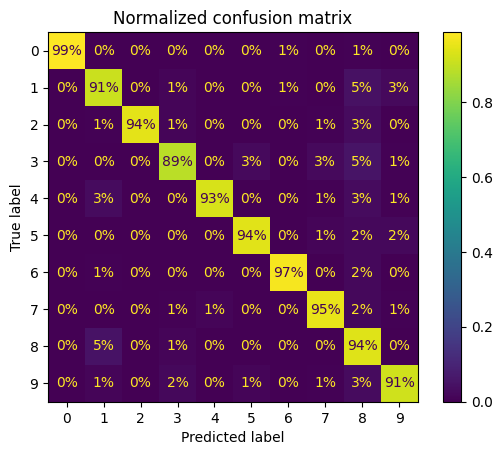

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate cross-validated predictions on scaled training data
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# Plot confusion matrix (counts)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Confusion matrix")
plt.show()

# Plot normalized confusion matrix (proportions per class)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')
plt.title("Normalized confusion matrix")
plt.show()
